In [3]:
import os
import time
import uuid
import cv2

import albumentations as alb
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [4]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30
IMAGES_PATH

'data\\images'

In [5]:
"""cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()"""

"cap = cv2.VideoCapture(0)\nfor imgnum in range(number_images):\n    print('Collecting image {}'.format(imgnum))\n    ret, frame = cap.read()\n    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')\n    cv2.imwrite(imgname, frame)\n    cv2.imshow('frame', frame)\n    time.sleep(0.5)\n\n    if cv2.waitKey(1) & 0xFF == ord('q'):\n        break\n\ncap.release()\ncv2.destroyAllWindows()"

In [6]:
# Label the images using labelme
# !labelme

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

In [9]:
#images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=True)

In [10]:
#images.as_numpy_iterator().next()

In [11]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
#images = images.map(load_image)

In [13]:
#images.as_numpy_iterator().next()

In [14]:
#type(images)

In [15]:
#image_gen = images.batch(4).as_numpy_iterator()

In [16]:
#plot_images = image_gen.next()

In [17]:
"""fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()"""

'fig, ax = plt.subplots(ncols=4, figsize=(20, 20))\nfor idx, image in enumerate(plot_images):\n    ax[idx].imshow(image)\nplt.show()'

In [18]:
import random
import shutil
import glob
from pathlib import Path

def train_test_val_split_jpeg(data_path: str,
                              train_ratio=0.6,
                              val_ratio=0.2,
                              test_ratio=0.2):
    """Splits all image data (.jpg extension) to 3 separate folders: train, val, test with the default ratio of (6/2/2)."""
    # Get the list of images in the data directory
    image_files = glob.glob(os.path.join(data_path, "*.jpg"))
    imageCount = len(image_files)

    # Create the train, test, split folders
    PARENT_PATH = str(Path(data_path).parent.absolute())
    TRAIN_FOLDER_PATH = os.path.join(PARENT_PATH, "train")
    VAL_FOLDER_PATH = os.path.join(PARENT_PATH, "val")
    TEST_FOLDER_PATH = os.path.join(PARENT_PATH, "test")
    IMAGE_FOLDER_NAME = "images"
    LABEL_FOLDER_NAME = "labels"

    for folder in [TRAIN_FOLDER_PATH, VAL_FOLDER_PATH, TEST_FOLDER_PATH]:
        if not os.path.exists(folder):
            print(f"Creating folder at {folder} ...")
            os.makedirs(os.path.join(folder, IMAGE_FOLDER_NAME))
            os.makedirs(os.path.join(folder, LABEL_FOLDER_NAME))
        else:
            print(f"Found {folder.split(os.sep)[-1]} folder, skipping...")

    # Shuffle the image files
    random.shuffle(image_files)

    # Calculate the number of images for each split
    numTrain = int(imageCount * train_ratio)
    numVal = int(imageCount * val_ratio)
    numTest = imageCount - numTrain - numVal

    # Split the images
    splits = {
        "train": image_files[:numTrain],
        "val": image_files[numTrain:numTrain + numVal],
        "test": image_files[numTrain + numVal:]
    }

    for split, files in splits.items():
        for file in files:
            file_name = os.path.basename(file)
            label_file = file.replace(".jpg", ".json")  # Assuming label files are in .json format

            dest_image_path = os.path.join(PARENT_PATH, split, IMAGE_FOLDER_NAME, file_name)
            dest_label_path = os.path.join(PARENT_PATH, split, LABEL_FOLDER_NAME, os.path.basename(label_file))

            shutil.move(file, dest_image_path)
            if os.path.exists(label_file):
                shutil.move(label_file, dest_label_path)

        print(f"Moved {len(files)}/{len(files)} files to {split} (ratio: {eval(split + '_ratio')})")

# Example usage
train_test_val_split_jpeg('data/images')

Found train folder, skipping...
Found val folder, skipping...
Found test folder, skipping...
Moved 0/0 files to train (ratio: 0.6)
Moved 0/0 files to val (ratio: 0.2)
Moved 0/0 files to test (ratio: 0.2)


In [19]:
img = cv2.imread(os.path.join('data', 'train', 'images', '8a6d3ee0-4344-11ef-87af-f854f63b872e.jpg'))
img

array([[[134, 113, 111],
        [135, 116, 113],
        [136, 116, 115],
        ...,
        [109,  82,  68],
        [101,  73,  62],
        [ 92,  65,  55]],

       [[134, 114, 109],
        [135, 116, 111],
        [134, 117, 114],
        ...,
        [106,  79,  65],
        [ 99,  72,  62],
        [ 90,  65,  55]],

       [[134, 116, 109],
        [135, 117, 110],
        [134, 118, 111],
        ...,
        [ 99,  73,  61],
        [ 91,  66,  56],
        [ 83,  60,  52]],

       ...,

       [[148, 127,  96],
        [147, 127,  96],
        [147, 127,  96],
        ...,
        [ 43,  24,  27],
        [ 43,  24,  27],
        [ 43,  24,  27]],

       [[150, 127,  95],
        [148, 127,  95],
        [148, 127,  95],
        ...,
        [ 43,  25,  26],
        [ 43,  25,  26],
        [ 43,  25,  26]],

       [[151, 129,  94],
        [150, 128,  93],
        [148, 128,  93],
        ...,
        [ 43,  25,  26],
        [ 44,  26,  27],
        [ 44,  26,  27]]

In [20]:
import json

with open(os.path.join('data', 'train', 'labels', '8a6d3ee0-4344-11ef-87af-f854f63b872e.json'), 'r') as f:
    label = json.load(f)

label['shapes'][0]['points']

[[279.1666666666667, 67.22222222222221],
 [546.3888888888889, 398.3333333333333]]

In [21]:
coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [22]:
coords

[279.1666666666667, 67.22222222222221, 546.3888888888889, 398.3333333333333]

In [23]:
coords = list(np.divide(coords, [640, 480, 640, 480]))

In [24]:
coords

[0.4361979166666667, 0.14004629629629628, 0.853732638888889, 0.829861111111111]

In [25]:
import albumentations as alb

In [26]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params=alb.BboxParams(format='albumentations',
                                                    label_fields=['class_labels']))

In [27]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
augmented['bboxes']

[(0.20037037037037042,
  0.0893827160493827,
  0.7941975308641975,
  0.8251851851851851)]

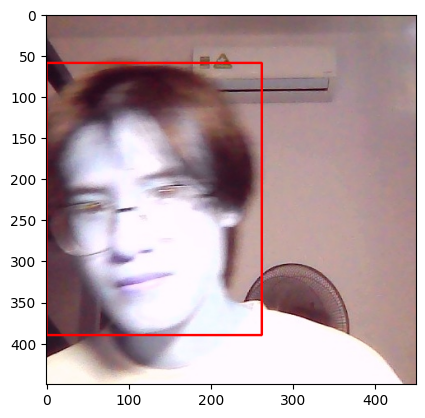

In [28]:
from pathlib import Path

def sample_visualizer(img_path):
    imagename = os.path.basename(img_path)
    image = cv2.imread(img_path)
    parent_path = str(Path(img_path).parents[1])
    labelfile = f'{imagename.split(".")[0]}.{imagename.split(".")[1]}.json'
    label_path = os.path.join(parent_path, 'labels', labelfile)
    with open(label_path, 'r') as f:
        label = json.load(f)

    cv2.rectangle(image,
                tuple(np.multiply(label['bbox'][:2], [450, 450]).astype(int)),
                tuple(np.multiply(label['bbox'][2:], [450, 450]).astype(int)),
                (255, 0, 0), 2)
    plt.imshow(image)

sample_visualizer(os.path.join('data', 'aug_data', 'train', 'images', '8a6d3ee0-4344-11ef-87af-f854f63b872e.0.jpg'))

In [29]:
AUG_PATH = "data\\aug_data"
if not os.path.exists(AUG_PATH):
    os.makedirs(AUG_PATH)
    AUG_TRAIN_PATH = os.path.join(AUG_PATH, 'train')
    AUG_VAL_PATH = os.path.join(AUG_PATH, 'val')
    AUG_TEST_PATH = os.path.join(AUG_PATH, 'test')
    
    os.makedirs(AUG_TRAIN_PATH)
    os.makedirs(os.path.join(AUG_TRAIN_PATH, 'images'))
    os.makedirs(os.path.join(AUG_TRAIN_PATH, 'labels'))

    os.makedirs(AUG_VAL_PATH)
    os.makedirs(os.path.join(AUG_VAL_PATH, 'images'))
    os.makedirs(os.path.join(AUG_VAL_PATH, 'labels'))
    
    os.makedirs(AUG_TEST_PATH)
    os.makedirs(os.path.join(AUG_TEST_PATH, 'images'))
    os.makedirs(os.path.join(AUG_TEST_PATH, 'labels'))

In [30]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('data', 'aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(os.path.join('data', 'aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
                    
        except Exception as e:
            print(e)

In [31]:
# Load Augmented Imagé to TF Dataset

def load_augmented_image(data_path, shuffle=False, filetype='jpg'):
    imagefiles = tf.data.Dataset.list_files(os.path.join(data_path, f'*.{filetype}'), shuffle=shuffle)
    imagefiles = imagefiles.map(load_image)
    imagefiles = imagefiles.map(lambda x: tf.image.resize(x, (120, 120)))
    imagefiles = imagefiles.map(lambda x: x/255)
    return imagefiles

train_images = load_augmented_image('data\\aug_data\\train\\images')
test_images = load_augmented_image('data\\aug_data\\test\\images')
val_images = load_augmented_image('data\\aug_data\\val\\images')

In [32]:
def get_labels(label_path):
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        label = json.load(f)
    return [label['class']], label['bbox']

In [33]:
# Load labels to TF Dataset
def load_labels(label_path: str, shuffle=False):
    """Load label class and bbox from .json files"""
    labels = tf.data.Dataset.list_files(os.path.join(label_path, f'*.json'), shuffle=shuffle)
    labels = labels.map(lambda x: tf.py_function(get_labels, [x], [tf.uint8, tf.float32]))
    return labels

# Load train, test, val labels
train_labels = load_labels('data\\aug_data\\train\\labels')
test_labels = load_labels('data\\aug_data\\test\\labels')
val_labels = load_labels('data\\aug_data\\val\\labels')

In [34]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels),

(3240, 3240, 1080, 1080, 1080, 1080)

In [35]:
# Define the preprocessing function
def preprocess_data(image, label):
    # Resize the image and set the shapes
    image = tf.image.resize(image, (120, 120))
    image.set_shape((120, 120, 3))
    label[0].set_shape((1,))  # Assuming label[0] is a scalar or single value
    label[1].set_shape((4,))  # Assuming label[1] is a bounding box with 4 coordinates
    return image, label

# Create Final Dataset (Images/Labels)
def zip_dataset(image_data, label_data, batch_size=8, prefetch=4):
    shuffle_size = int(len(image_data) * 1.2)
    data = tf.data.Dataset.zip((image_data, label_data))
    data = data.map(preprocess_data)
    data = data.shuffle(shuffle_size)
    data = data.batch(batch_size)
    data = data.prefetch(prefetch)
    return data

train = zip_dataset(train_images, train_labels)
test = zip_dataset(test_images, test_labels)
val = zip_dataset(val_images, val_labels)

In [36]:
type(train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [37]:
sample = train.as_numpy_iterator()
res = sample.next()

X, y = res

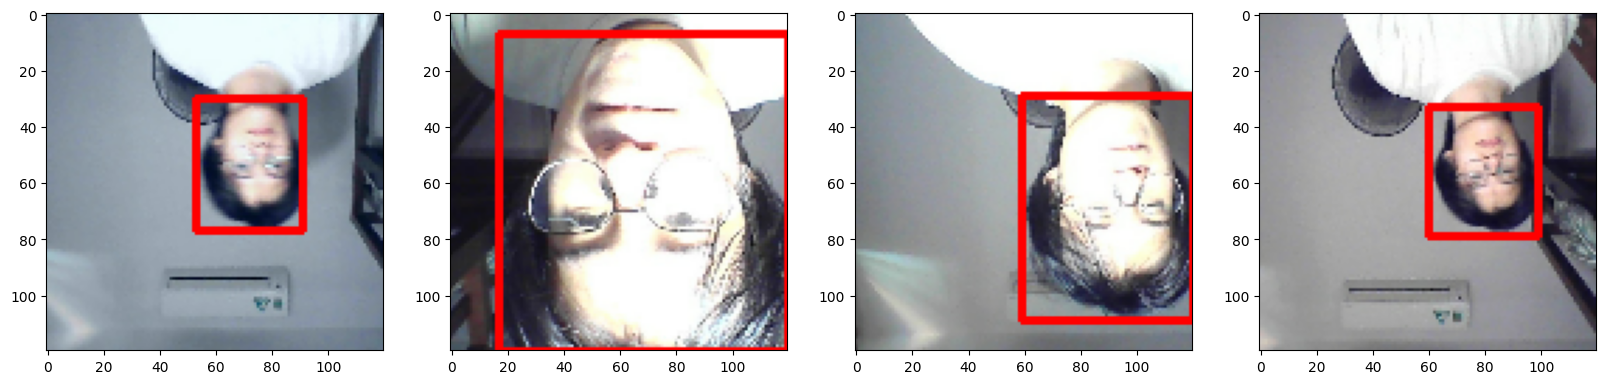

In [38]:
def batch_visualize(dataset):
    data_samples = dataset.as_numpy_iterator()
    res = data_samples.next()
    batch_size = dataset.as_numpy_iterator().next()[0].shape[0]
    fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
    for idx in range(4):
        sample_image = res[0][idx] * 255
        sample_image = sample_image.astype(np.uint8)
        sample_coords = res[1][1][idx]

        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                      (255, 0, 0), 2)
        ax[idx].imshow(sample_image)
        

batch_visualize(train)

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [40]:
vgg = VGG16(include_top=False)

In [41]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Build instance of Network

def build_model():
    input_layer = Input(shape=(120, 120, 3))
    vgg = VGG16(include_top=False)(input_layer)
    
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    f2 = GlobalMaxPooling2D()(vgg)
    reg1 = Dense(2048, activation='relu')(f1)
    reg2 = Dense(4, activation='sigmoid')(reg1)

    facetracker = Model(inputs=input_layer, outputs=[class2, reg2])
    return facetracker

In [43]:
facetracker = build_model()

In [44]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
X, y = train.as_numpy_iterator().next()

In [46]:
X.shape

(8, 120, 120, 3)

In [47]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


In [48]:
classes, coords

(array([[0.622199  ],
        [0.6725604 ],
        [0.6755049 ],
        [0.6400629 ],
        [0.66522694],
        [0.57072574],
        [0.622146  ],
        [0.5557251 ]], dtype=float32),
 array([[0.42478228, 0.5052469 , 0.480564  , 0.65472406],
        [0.5649022 , 0.6228987 , 0.62408626, 0.6502251 ],
        [0.49561578, 0.6479193 , 0.5936296 , 0.6227358 ],
        [0.48488906, 0.590036  , 0.5885931 , 0.53993964],
        [0.5136452 , 0.6228545 , 0.5756843 , 0.61963296],
        [0.4887134 , 0.5426533 , 0.49712837, 0.59105325],
        [0.4457496 , 0.53229165, 0.56110257, 0.64962226],
        [0.5094274 , 0.6229296 , 0.60805947, 0.64361805]], dtype=float32))

In [49]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 - 1) / batches_per_epoch

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

d:\Coding\face-recognition\.env\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [51]:
classification_loss = tf.keras.losses.BinaryCrossentropy()

In [52]:
#localization_loss(y[1], coords).numpy()

In [53]:
classification_loss(y[0], classes).numpy()

0.55335665

In [54]:
def localization_loss(y_true, y_hat):

    delta_coords = tf.reduce_sum(tf.square(y_true[:, :2], - y_hat[:,:2]))

    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]

    h_pred = y_hat[:, 3] - y_hat[:, 1]
    w_pred = y_hat[:, 2] - y_hat[:, 0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coords + delta_size

In [55]:
class FaceTracker(Model):
    def __init__(self, facetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, optimizer, class_loss, localization_loss, **kwargs):
        super().compile(**kwargs)
        self.c_loss = class_loss
        self.local_loss = localization_loss
        self.optimizer = optimizer

    def train_step(self, batch, **kwargs):
        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            # Ensure y[0] and classes are tensors
            y_true = tf.convert_to_tensor(y[0])
            y_pred = tf.convert_to_tensor(classes)

            batch_class_loss = self.c_loss(y_true, y_pred)
            batch_localization_loss = self.local_loss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localization_loss + 0.5 * batch_class_loss

        grad = tape.gradient(total_loss, self.model.trainable_variables)

        self.optimizer.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss,
                "class_loss": batch_class_loss,
                "reg_loss": batch_localization_loss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_class_loss = self.c_loss(y[0], classes)
        batch_localization_loss = self.local_loss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localization_loss + 0.5 * batch_class_loss

        return {"total_loss": total_loss,
                "class_loss": batch_class_loss,
                "reg_loss": batch_localization_loss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [56]:
model = FaceTracker(facetracker)

In [57]:
loc_loss = localization_loss

model.compile(optimizer=optimizer,
              class_loss=classification_loss,
              localization_loss=tf.keras.losses.MeanAbsoluteError())

In [58]:
logdir = 'logs'

In [57]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [58]:
tf.keras.config.disable_traceback_filtering()
steps_per_epoch = tf.data.experimental.cardinality(train).numpy()
hist = model.fit(train, 
                 epochs=40,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=val,
                 callbacks=[tensorboard_callback])

Epoch 1/40


405/405 ━━━━━━━━━━━━━━━━━━━━ 170s 408ms/step - class_loss: 0.0701 - reg_loss: 0.0651 - total_loss: 0.1002 - val_class_loss: 0.0017 - val_reg_loss: 0.0295 - val_total_loss: 0.0303
Epoch 2/40


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


405/405 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - class_loss: 0.0078 - reg_loss: 0.0506 - total_loss: 0.0545 - val_class_loss: 0.0021 - val_reg_loss: 0.0262 - val_total_loss: 0.0272
Epoch 3/40
405/405 ━━━━━━━━━━━━━━━━━━━━ 155s 379ms/step - class_loss: 0.0293 - reg_loss: 0.0315 - total_loss: 0.0461 - val_class_loss: 0.0197 - val_reg_loss: 0.0449 - val_total_loss: 0.0547
Epoch 4/40
405/405 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - class_loss: 0.0031 - reg_loss: 0.0534 - total_loss: 0.0549 - val_class_loss: 0.0189 - val_reg_loss: 0.0560 - val_total_loss: 0.0654
Epoch 5/40
405/405 ━━━━━━━━━━━━━━━━━━━━ 164s 403ms/step - class_loss: 0.0113 - reg_loss: 0.0224 - total_loss: 0.0281 - val_class_loss: 6.7383e-04 - val_reg_loss: 0.0127 - val_total_loss: 0.0130
Epoch 6/40
405/405 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - class_loss: 2.8332e-04 - reg_loss: 0.0128 - total_loss: 0.0130 - val_class_loss: 5.1305e-04 - val_reg_loss: 0.0188 - val_total_loss: 0.0191
Epoch 7/40
405/405 ━━━━━━━━━━━━━━━━━━━━ 165s 404ms/step

In [59]:
hist.history

{'class_loss': [0.007764106150716543,
  0.007764106150716543,
  0.003096897155046463,
  0.003096897155046463,
  0.0002833217440638691,
  0.0002833217440638691,
  2.3829539713915437e-05,
  2.3829539713915437e-05,
  4.1939798393286765e-05,
  4.1939798393286765e-05,
  3.809417466982268e-05,
  3.809417466982268e-05,
  1.766027526173275e-05,
  1.766027526173275e-05,
  5.490021067089401e-06,
  5.490021067089401e-06,
  2.666868931555655e-05,
  2.666868931555655e-05,
  7.695070962654427e-06,
  7.695070962654427e-06,
  1.850881290010875e-06,
  1.850881290010875e-06,
  1.4749525689694565e-05,
  1.4749525689694565e-05,
  3.376228733031894e-06,
  3.376228733031894e-06,
  1.5067465938045643e-05,
  1.5067465938045643e-05,
  0.019219789654016495,
  0.019219789654016495,
  0.01668384112417698,
  0.01668384112417698,
  0.056708402931690216,
  0.056708402931690216,
  0.0002848145377356559,
  0.0002848145377356559,
  3.314847344881855e-05,
  3.314847344881855e-05,
  0.0003176135360263288,
  0.00031761353

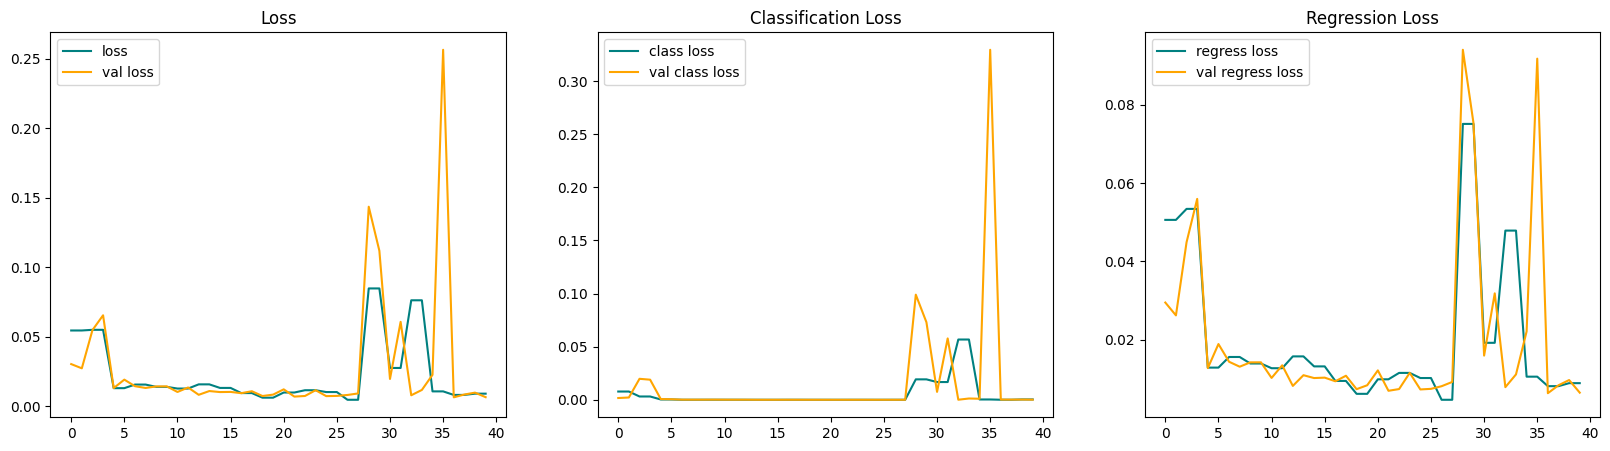

In [60]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['reg_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_reg_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [61]:
test_data = test.as_numpy_iterator()

In [62]:
test_sample = test_data.next()

In [63]:
y_hat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


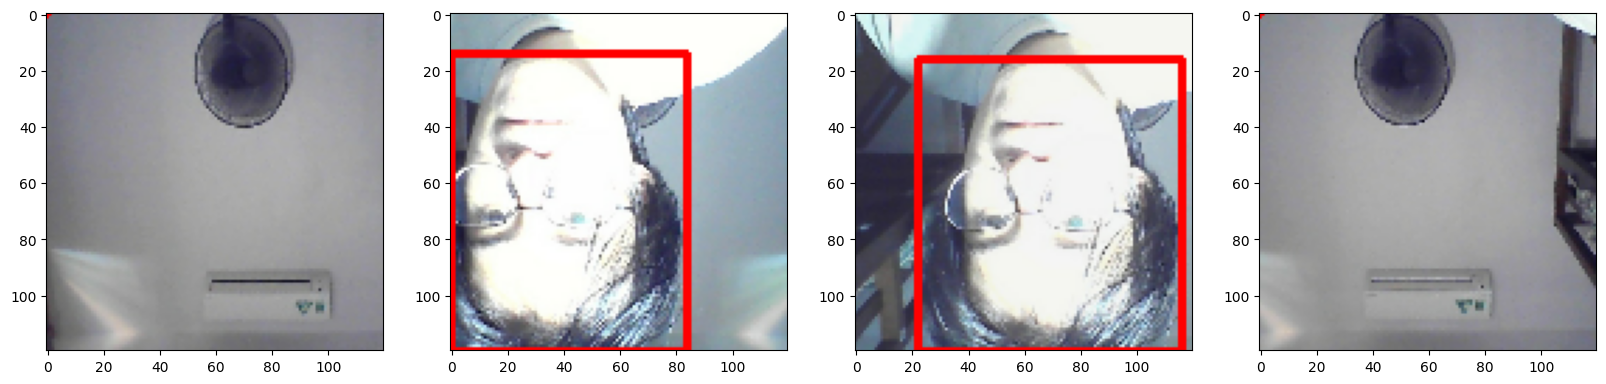

In [62]:
batch_visualize(test)

In [67]:
# Save the model

facetracker.save('facetracker.h5')

# Load the model


In [2]:
from tensorflow.keras.models import load_model

facetracker = load_model('facetracker.h5')

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━